In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate
from sklearn.model_selection import RepeatedKFold

from sklearn import metrics

In [19]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [20]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
df['logD'] = np.log10(df['diffusivity'])
# df = df.dropna()
# df[df.gas == 'propylene']['logD'].max()
df[df.gas == 'H2']['logD'].count()

61

In [21]:
# df = df[df.gas != 'butane']
# df = df[df.gas != 'ch4']
# df = df[df.type != 'Co-Br-ZIF-7-8']
# df.type.unique
df=df.drop_duplicates(subset=['type'], keep='first')
df

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications,logD
0,CdIF-1,1.8077,3.92000,3.93000,1.002551,2.1800,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.39,2.66,2.6,6.000000e-08,NaN,NaN,NaN,NaN,NaN,627.0,596.0,72.0,-7.221849
11,ZIF-8,1.6991,3.46000,3.47000,1.002890,1.9800,2.048,52802.10,74,1.3429,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1200,-0.1200,-0.1200,He,4.002,0.000121,-0.39,2.66,2.6,2.210000e-08,0.00590,13039.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.655608
23,ZIF-Cu,1.6475,3.20000,3.26000,1.018750,1.8785,2.025,50542.72,71,1.2249,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1982,-0.1982,-0.1982,He,4.002,0.000121,-0.39,2.66,2.6,1.600000e-08,0.00566,9056.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.795880
34,ZIF-67,1.6959,3.32000,3.36000,1.012048,1.9600,2.044,58910.70,72,1.3497,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342,He,4.002,0.000121,-0.39,2.66,2.6,1.340000e-08,0.01000,13400.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.872895
45,BeIF-1,1.6161,2.88000,2.88000,1.000000,1.7300,1.749,56400.30,41,1.6627,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1266,-0.1266,-0.1266,He,4.002,0.000121,-0.39,2.66,2.6,6.400000e-09,0.01000,6400.0,NaN,NaN,NaN,NaN,NaN,NaN,-8.193820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,dIm_Be,NaN,2.75316,2.76198,1.003204,NaN,1.798,41171.00,41,2.8205,-0.208,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.3300,-0.3300,-0.3300,He,4.002,0.000121,-0.39,2.66,2.6,3.100000e-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.508638
805,dIm_Co,NaN,2.91071,2.92661,1.005463,NaN,2.084,45355.00,72,2.0924,-0.189,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2730,-0.2730,-0.2730,He,4.002,0.000121,-0.39,2.66,2.6,5.800000e-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.236572
817,dIm_Cu,NaN,2.89378,2.90368,1.003421,NaN,2.070,36987.00,71,1.9151,-0.189,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2910,-0.2910,-0.2910,He,4.002,0.000121,-0.39,2.66,2.6,3.100000e-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.508638
829,dIm_Cd,NaN,2.99000,3.00007,1.003368,NaN,2.294,36233.00,92,1.1732,-0.169,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2420,-0.2420,-0.2420,He,4.002,0.000121,-0.39,2.66,2.6,4.100000e-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.387216


# Keep only the columns I need

In [22]:
# df2=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'gas', 'apertureAtom_e', 'ionicRad']]
df2=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF',
       'apertureAtom_σ', 'apertureAtom_e', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge',]]
df2.head()

,aperture,size - van der Waals (Å),mass,ascentricF,size - kinetic diameter (Å),ionicRad,Μ-N_lff,Μ-N_kFF,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,3.92,2.66,4.002,-0.39,2.6,92,2.257,45354.60,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
11,3.46,2.66,4.002,-0.39,2.6,74,2.048,52802.10,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1200,-0.1200,-0.1200
23,3.20,2.66,4.002,-0.39,2.6,71,2.025,50542.72,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1982,-0.1982,-0.1982
34,3.32,2.66,4.002,-0.39,2.6,72,2.044,58910.70,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
45,2.88,2.66,4.002,-0.39,2.6,41,1.749,56400.30,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1266,-0.1266,-0.1266


# Get a first correlation of ionic radius with aperture

In [23]:
df2[['aperture','logD']].corr(method="spearman")

KeyError: "['logD'] not in index"

In [24]:
df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter', 'apertureAtom_e':'e' })

In [25]:
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df2

,aperture,diameter,mass,ascentricF,kdiameter,ionicRad,Μ-N_lff,Μ-N_kFF,apertureAtom_σ,e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,3.92000,2.66,4.002,-0.39,2.6,92,2.257,45354.60,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
1,3.46000,2.66,4.002,-0.39,2.6,74,2.048,52802.10,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1200,-0.1200,-0.1200
2,3.20000,2.66,4.002,-0.39,2.6,71,2.025,50542.72,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1982,-0.1982,-0.1982
3,3.32000,2.66,4.002,-0.39,2.6,72,2.044,58910.70,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
4,2.88000,2.66,4.002,-0.39,2.6,41,1.749,56400.30,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1266,-0.1266,-0.1266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.75316,2.66,4.002,-0.39,2.6,41,1.798,41171.00,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.3300,-0.3300,-0.3300
68,2.91071,2.66,4.002,-0.39,2.6,72,2.084,45355.00,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2730,-0.2730,-0.2730
69,2.89378,2.66,4.002,-0.39,2.6,71,2.070,36987.00,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2910,-0.2910,-0.2910
70,2.99000,2.66,4.002,-0.39,2.6,92,2.294,36233.00,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2420,-0.2420,-0.2420


# Add linker and functional info

In [26]:
# x = np.asanyarray(df2[['aperture', 'apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
#        'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
#        'func1_length', 'func2_length', 'func3_length', 'func1_mass',
#        'func2_mass', 'func3_mass','ionicRad','e','Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge','func1_charge', 'func2_charge',
#        'func3_charge' ]])
# y = np.asanyarray(df2[['logD']])

x = np.asanyarray(df2[['apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass','e' ]])
y = np.asanyarray(df2[['aperture']])

In [27]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=6,random_state=1)
# NNregr = MLPRegressor(hidden_layer_sizes=(30, 10, 20), solver='lbfgs', random_state=1, max_iter=4000)
RF = RandomForestRegressor(max_depth=6, random_state=1)
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=0,loss='squared_error')
XGBR = XGBRegressor(n_estimators=200, max_depth=3, eta=0.2, subsample=0.8, colsample_bytree=0.8)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF, data_yhat_GBR, data_yhat_XGBR = list(), list(), list(), list(), list(), list(), list()
kfold = KFold(n_splits=10, shuffle=True, random_state=500)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    # NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    GBR.fit(train_X, train_y.ravel())
    XGBR.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    # yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)
    yhat_GBR = GBR.predict(test_X)
    yhat_XGBR = XGBR.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    # data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    data_yhat_GBR.extend(yhat_GBR)
    data_yhat_XGBR.extend(yhat_XGBR)
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (metrics.explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (metrics.explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

# R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
# Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
# Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
# EV_NN = (metrics.explained_variance_score(data_y, data_yhat_NN))
# Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
# MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (metrics.explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))

R2_GBR = (metrics.r2_score(data_y, data_yhat_GBR))
Med_ABS_er_GBR = (metrics.median_absolute_error(data_y, data_yhat_GBR))
Max_error_GBR = (metrics.max_error(data_y, data_yhat_GBR))
EV_GBR = (metrics.explained_variance_score(data_y, data_yhat_GBR))
Mean_abs_perc_error_GBR = (metrics.mean_absolute_percentage_error(data_y, data_yhat_GBR))
MSE_GBR = (metrics.mean_squared_error(data_y, data_yhat_GBR))

R2_XGBR = (metrics.r2_score(data_y, data_yhat_XGBR))
Med_ABS_er_XGBR = (metrics.median_absolute_error(data_y, data_yhat_XGBR))
Max_error_XGBR = (metrics.max_error(data_y, data_yhat_XGBR))
EV_XGBR = (metrics.explained_variance_score(data_y, data_yhat_XGBR))
Mean_abs_perc_error_XGBR = (metrics.mean_absolute_percentage_error(data_y, data_yhat_XGBR))
MSE_XGBR = (metrics.mean_squared_error(data_y, data_yhat_XGBR))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF],
           ["Gradient Tree Boosting", R2_GBR, Med_ABS_er_GBR, Max_error_GBR, EV_GBR, Mean_abs_perc_error_GBR, MSE_GBR],
           ["Extreme Gradient Boosting", R2_XGBR, Med_ABS_er_XGBR, Max_error_XGBR, EV_XGBR, Mean_abs_perc_error_XGBR, MSE_XGBR]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒═══════════════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤═══════╕
│ Model                     │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │   MSE │
╞═══════════════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪═══════╡
│ Regression                │ 0.893 │           0.101 │       0.975 │                0.893 │                 0.047 │ 0.040 │
├───────────────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Decision tree             │ 0.918 │           0.074 │       0.535 │                0.919 │                 0.042 │ 0.031 │
├───────────────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Random Forest             │ 0.937 │           0.076 │       0.405 │                0.937 │                 0.039 │ 0.024 │


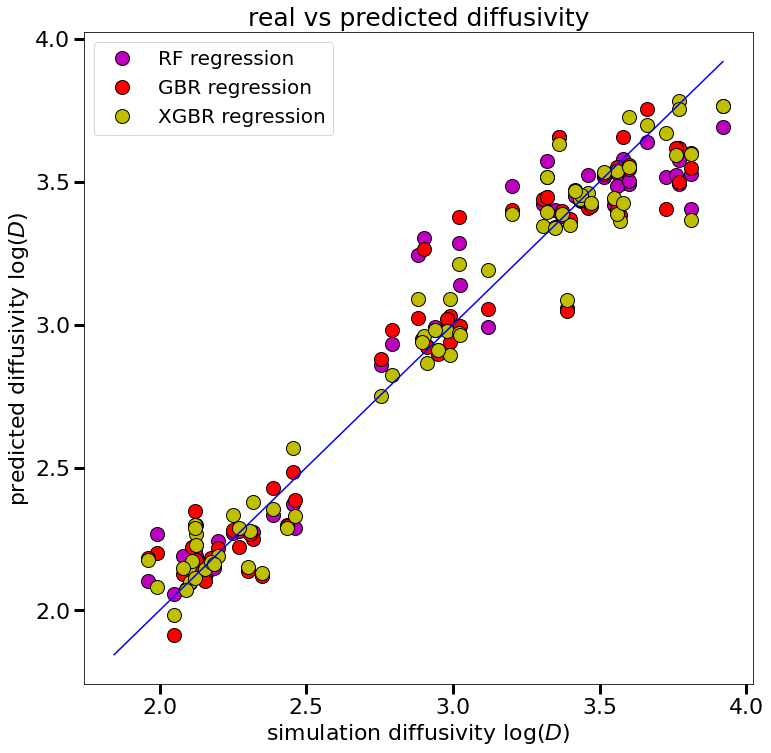

In [29]:
# plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
# plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='14', linewidth=3, markeredgecolor='k')
# plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='RF regression', c='m', markersize='14', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_GBR, 'o', label='GBR regression', c='r', markersize='14', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_XGBR, 'o', label='XGBR regression', c='y', markersize='14', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity log($D$)', fontsize=22)
plt.ylabel('predicted diffusivity log($D$)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.savefig('diffusivity_DT_RF_GBR.png', bbox_inches='tight')
plt.show()

# With repeated K-Fold

In [30]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=7,random_state=1)
# NNregr = MLPRegressor(hidden_layer_sizes=(30, 10, 20), solver='lbfgs', random_state=1, max_iter=4000)
RF = RandomForestRegressor(max_depth=7, random_state=1)
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=0,loss='squared_error')
XGBR = XGBRegressor(n_estimators=200, max_depth=3, eta=0.2, subsample=0.8, colsample_bytree=0.8)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF, data_yhat_GBR, data_yhat_XGBR = list(), list(), list(), list(), list(), list(), list()
Repfold = RepeatedKFold(n_splits=40, n_repeats=10, random_state=2652124)
# enumerate splits
for train_ix, test_ix in Repfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    # NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    GBR.fit(train_X, train_y.ravel())
    XGBR.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    # yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)
    yhat_GBR = GBR.predict(test_X)
    yhat_XGBR = XGBR.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    # data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    data_yhat_GBR.extend(yhat_GBR)
    data_yhat_XGBR.extend(yhat_XGBR)
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (metrics.explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (metrics.explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

# R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
# Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
# Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
# EV_NN = (metrics.explained_variance_score(data_y, data_yhat_NN))
# Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
# MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (metrics.explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))

R2_GBR = (metrics.r2_score(data_y, data_yhat_GBR))
Med_ABS_er_GBR = (metrics.median_absolute_error(data_y, data_yhat_GBR))
Max_error_GBR = (metrics.max_error(data_y, data_yhat_GBR))
EV_GBR = (metrics.explained_variance_score(data_y, data_yhat_GBR))
Mean_abs_perc_error_GBR = (metrics.mean_absolute_percentage_error(data_y, data_yhat_GBR))
MSE_GBR = (metrics.mean_squared_error(data_y, data_yhat_GBR))

R2_XGBR = (metrics.r2_score(data_y, data_yhat_XGBR))
Med_ABS_er_XGBR = (metrics.median_absolute_error(data_y, data_yhat_XGBR))
Max_error_XGBR = (metrics.max_error(data_y, data_yhat_XGBR))
EV_XGBR = (metrics.explained_variance_score(data_y, data_yhat_XGBR))
Mean_abs_perc_error_XGBR = (metrics.mean_absolute_percentage_error(data_y, data_yhat_XGBR))
MSE_XGBR = (metrics.mean_squared_error(data_y, data_yhat_XGBR))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF],
           ["Gradient Tree Boosting", R2_GBR, Med_ABS_er_GBR, Max_error_GBR, EV_GBR, Mean_abs_perc_error_GBR, MSE_GBR],
           ["Extreme Gradient Boosting", R2_XGBR, Med_ABS_er_XGBR, Max_error_XGBR, EV_XGBR, Mean_abs_perc_error_XGBR, MSE_XGBR]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒═══════════════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤═══════╕
│ Model                     │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │   MSE │
╞═══════════════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪═══════╡
│ Regression                │ 0.907 │           0.108 │       0.874 │                0.907 │                 0.047 │ 0.035 │
├───────────────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Decision tree             │ 0.895 │           0.080 │       0.537 │                0.895 │                 0.048 │ 0.039 │
├───────────────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Random Forest             │ 0.932 │           0.084 │       0.476 │                0.932 │                 0.041 │ 0.026 │


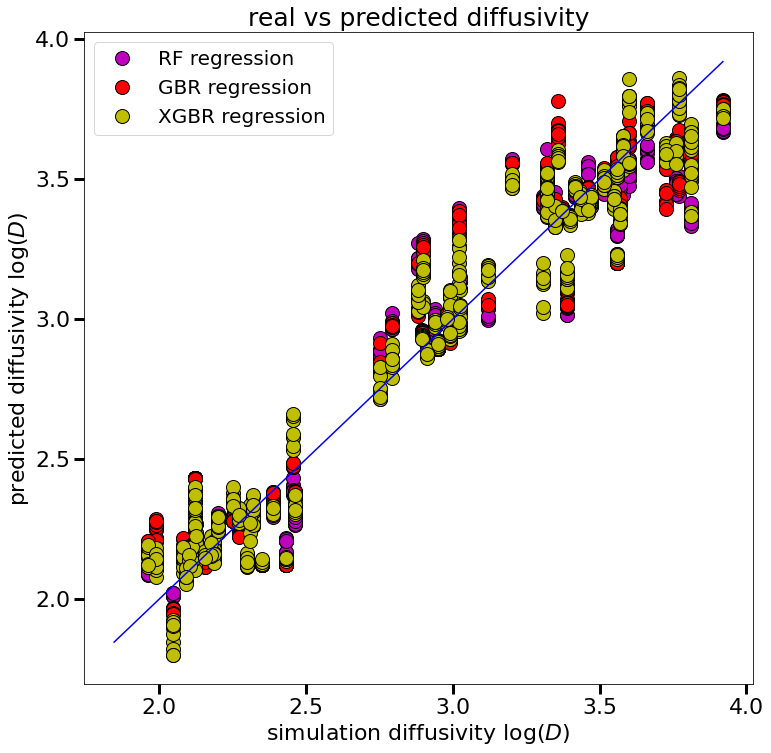

In [31]:
# plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
# plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='14', linewidth=3, markeredgecolor='k')
# plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='RF regression', c='m', markersize='14', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_GBR, 'o', label='GBR regression', c='r', markersize='14', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_XGBR, 'o', label='XGBR regression', c='y', markersize='14', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity log($D$)', fontsize=22)
plt.ylabel('predicted diffusivity log($D$)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.savefig('diffusivity_DT_RF_GBR.png', bbox_inches='tight')
plt.show()

In [32]:
import mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv

In [33]:
tree=DecisionTreeRegressor(random_state=None, max_depth=6)
rf = RandomForestRegressor(max_depth=6, random_state=None)
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=0,loss='squared_error')
XGBR = XGBRegressor(n_estimators=200, max_depth=3, eta=0.2, subsample=0.8, colsample_bytree=0.8)

In [34]:
t, p = paired_ttest_5x2cv(estimator1=GBR,
                          estimator2=rf,
                          X=x, y=y.ravel(),
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.275
p value: 0.794


In [35]:
from mlxtend.evaluate import paired_ttest_kfold_cv

In [36]:
t, p = paired_ttest_kfold_cv(estimator1=GBR,
                          estimator2=rf,
                          X=x, y=y.ravel(),
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.045
p value: 0.965


In [37]:
t, p = paired_ttest_5x2cv(estimator1=XGBR,
                          estimator2=RF,
                          X=x, y=y.ravel(),
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.396
p value: 0.709


In [ ]:
# colTran=df2['gas']
# df_with_dummies = pd.get_dummies( df2['gas'] )

In [ ]:
df_with_dummies